In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [4]:
dataset = pd.read_csv('Clean_Phone - Form Responses 1.csv')


In [5]:
dataset.Computer = dataset.Computer.replace(['Pc', 'Mac'], [0,1])
dataset.Unlock = dataset.Unlock.replace(['Face unlock', 'Touch id', 'Password'], [0,1, 2])
dataset.US = dataset.US.replace(['Yes', 'No'],[1,0])
dataset.Gmail = dataset.Gmail.replace(['Yes', 'No'],[1,0])
dataset.Phone = dataset.Phone.replace(['Iphone', 'Android'],[1,0])

In [6]:
X = dataset.drop(['Timestamp', 'Phone_Age', 'Phone', 'Subject'], axis=1)
y = dataset['Phone']

In [7]:
X.head()

,Computer,Homescreen,Age,Unlock,US,Siblings,Gmail
0,0,1,15,0,1,1,0
1,0,5,18,0,0,1,1
2,1,3,16,0,0,1,1
3,1,4,18,1,0,0,1
4,1,1,17,1,1,3,1


In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Phone, dtype: int64

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
rf_model = RandomForestClassifier()

In [12]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
rf_predictions = rf_model.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, rf_predictions))

Accuracy: 0.875


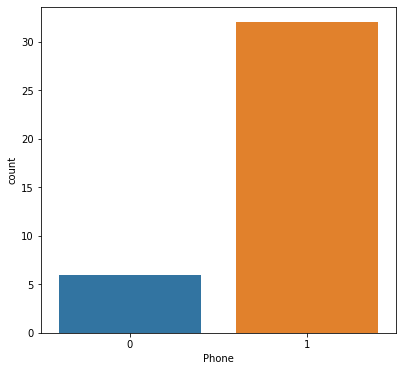

In [15]:
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'Phone', data = dataset)
plt.show()